In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
train_df=pd.read_csv('train_Data.csv')
train_df.head(10)

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10 00:00:00,2016-01-15 00:00:00,2012-02-10 00:00:00,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31 00:00:00,2016-02-15 00:00:00,2012-03-31 00:00:00,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17 00:00:00,2023-02-10 00:00:00,2017-06-17 00:00:00,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29 00:00:00,2017-11-10 00:00:00,2013-11-29 00:00:00,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08 00:00:00,2015-07-05 00:00:00,2011-12-08 00:00:00,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months
5,9,Monthly,Arrear,Closed,Billed,5,RAIPUR,48,400000,280000.0,280000.0,53000.0,2011-12-19 00:00:00,2015-12-15 00:00:00,2011-12-19 00:00:00,3413012,1019,54689,70.00,M,40.0,42083.33,RAIPUR,CHATTISGARH,493885.0,No Top-up Service
6,10,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,716000,450000.0,450000.0,2000.0,2011-12-31 00:00:00,2015-12-05 00:00:00,2011-12-31 00:00:00,3553579,1019,54689,62.85,M,23.0,46221.00,RAIPUR,CHATTISGARH,493889.0,No Top-up Service
7,11,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,600000,360000.0,360000.0,11000.0,2012-02-09 00:00:00,2016-02-15 00:00:00,2012-02-09 00:00:00,4008234,1187,21232,60.00,M,41.0,46195.08,RAIPUR,CHATTISGARH,493114.0,No Top-up Service
8,12,Monthly,Arrear,Closed,PDC,5,RAIPUR,46,539275,400000.0,400000.0,50000.0,2012-03-29 00:00:00,2016-01-15 00:00:00,2012-03-29 00:00:00,4603217,1046,24760,74.17,M,51.0,15000.00,RAIPUR,CHATTISGARH,493196.0,No Top-up Service
9,13,Monthly,Arrear,Closed,PDC,5,RAIPUR,48,689275,490000.0,490000.0,10000.0,2012-03-30 00:00:00,2016-02-15 00:00:00,2012-03-30 00:00:00,4619836,1046,24760,71.09,M,33.0,31666.67,RAIPUR,CHATTISGARH,493344.0,No Top-up Service


In [3]:
test_df=pd.read_excel("test_Data.xlsx")
test_df

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,365000.0,1000.0,2011-12-29,2015-10-05,2011-12-29,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,285000.0,9300.0,2012-04-28,2016-01-01,2012-04-28,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,400000.0,35800.0,2013-10-22,2017-09-10,2013-10-22,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,500000.0,52000.0,2013-05-21,2016-02-10,2013-05-21,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,400000.0,35400.0,2012-11-30,2016-12-05,2012-11-30,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,Monthly,Arrear,Closed,PDC,143,NEW DELHI BARAKHAMBHA ROAD,35,530016,419616.0,419616.0,14723.0,2012-02-29,2015-02-10,2012-02-29,4276747,1046.0,22094,79.17,NaN,NaN,NaN,GURGAON,HARYANA,122001.0
14741,143397,Monthly,Arrear,Closed,PDC,32,BANGALORE LALBAGH,36,595000,446500.0,446500.0,15491.0,2012-04-10,2015-04-05,2012-04-10,4746586,2721.0,61196,75.04,NaN,NaN,NaN,BANGALORE,KARNATAKA,560020.0
14742,143398,Monthly,Arrear,Closed,PDC,32,BANGALORE LALBAGH,36,595000,446500.0,446500.0,15491.0,2012-04-10,2015-04-05,2012-04-10,4746588,2721.0,61196,75.04,NaN,NaN,NaN,BANGALORE,KARNATAKA,560020.0
14743,143399,Monthly,Arrear,Closed,PDC_E,246,BIKANER,12,400000,280000.0,280000.0,25350.0,2013-07-25,2014-08-10,2013-07-26,11719081,1046.0,63565,70.00,M,NaN,NaN,GANGANAGAR,RAJASTHAN,335001.0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               128655 non-null  int64  
 1   Frequency        128655 non-null  object 
 2   InstlmentMode    128655 non-null  object 
 3   LoanStatus       128655 non-null  object 
 4   PaymentMode      128655 non-null  object 
 5   BranchID         128655 non-null  int64  
 6   Area             117002 non-null  object 
 7   Tenure           128655 non-null  int64  
 8   AssetCost        128655 non-null  int64  
 9   AmountFinance    128655 non-null  float64
 10  DisbursalAmount  128655 non-null  float64
 11  EMI              128655 non-null  float64
 12  DisbursalDate    128655 non-null  object 
 13  MaturityDAte     128654 non-null  object 
 14  AuthDate         128655 non-null  object 
 15  AssetID          128655 non-null  int64  
 16  ManufacturerID   128655 non-null  int6

In [5]:
train_df.shape

(128655, 26)

In [6]:
#df['train'].fillna(0,inplace=True)
#df['test'].fillna(0,inplace=True)

In [7]:
train_df.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64

In [8]:
train_df.drop(['Area','City','AuthDate'],axis=1,inplace=True)
test_df.drop(['Area','City','AuthDate'],axis=1,inplace=True)

In [9]:
import datetime
train_df['DisbursalDate']=pd.to_datetime(train_df['DisbursalDate'], format='%Y-%m-%d')
train_df['MaturityDAte']=pd.to_datetime(train_df['MaturityDAte'],errors='coerce')

In [10]:
train_df.isnull().sum()

ID                   0
Frequency            0
InstlmentMode        0
LoanStatus           0
PaymentMode          0
BranchID             0
Tenure               0
AssetCost            0
AmountFinance        0
DisbursalAmount      0
EMI                  0
DisbursalDate        0
MaturityDAte         1
AssetID              0
ManufacturerID       0
SupplierID           0
LTV                  0
SEX                 59
AGE                 59
MonthlyIncome      234
State                0
ZiPCODE            372
Top-up Month         0
dtype: int64

In [11]:
train_df[train_df['MaturityDAte'].isnull()]

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month
53392,57606,Monthly,Arrear,Closed,Billed,263,45,495000,400000.0,400000.0,0.0,2013-03-15,NaT,9510810,1046,55150,80.81,M,43.0,41666.67,MADHYA PRADESH,458880.0,No Top-up Service


In [12]:
train_df['MaturityDAte'].fillna((train_df.MaturityDAte + pd.DateOffset(months=45)),inplace=True)
train_df['SEX'].fillna(train_df['SEX'].mode()[0],inplace=True)
train_df['AGE'].fillna(train_df['AGE'].mean(),inplace=True)
train_df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(),inplace=True)
train_df['ZiPCODE'].fillna(train_df['ZiPCODE'].mode()[0],inplace=True)

In [13]:
test_df.isnull().sum()

ID                  0
Frequency           0
InstlmentMode       0
LoanStatus          0
PaymentMode         0
BranchID            0
Tenure              0
AssetCost           0
AmountFinance       0
DisbursalAmount     0
EMI                 0
DisbursalDate       0
MaturityDAte        0
AssetID             0
ManufacturerID      2
SupplierID          0
LTV                 0
SEX                 5
AGE                 7
MonthlyIncome      14
State               0
ZiPCODE             1
dtype: int64

In [14]:
test_df['ManufacturerID'].fillna(test_df['ManufacturerID'].mode()[0],inplace=True)
test_df['SEX'].fillna(test_df['SEX'].mode()[0],inplace=True)
test_df['AGE'].fillna(test_df['AGE'].mean(),inplace=True)
test_df['MonthlyIncome'].fillna(test_df['MonthlyIncome'].median(),inplace=True)
test_df['ZiPCODE'].fillna(test_df['ZiPCODE'].mode()[0],inplace=True)

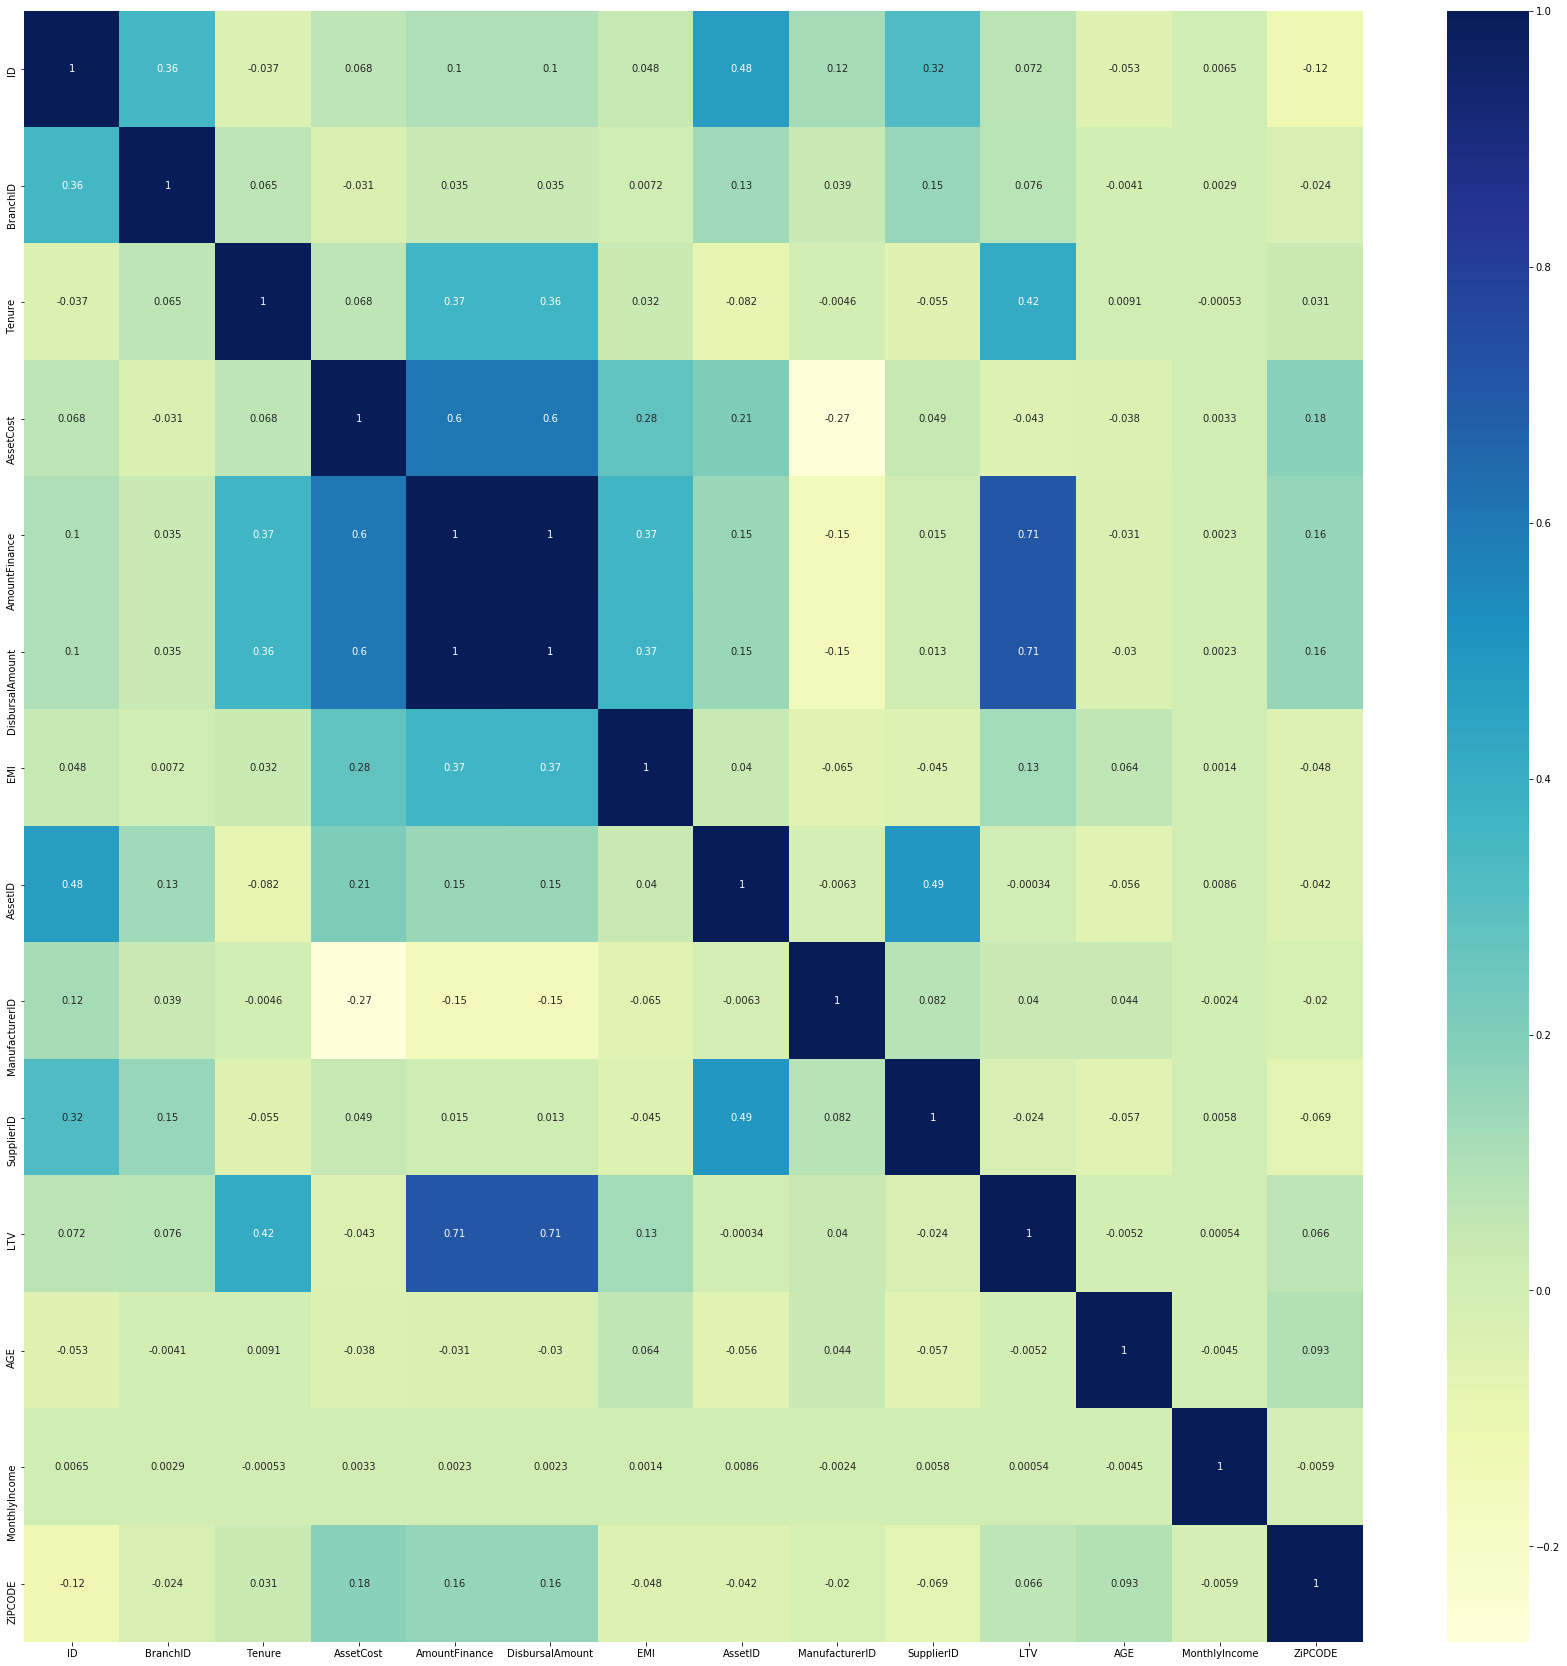

In [15]:
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(),annot=True,cmap='YlGnBu')

From the above we can see that the AccountFinance and DisbursedAmount is highly correlated with eachother, so we need to drop one of the features, and asset cost is also highly correlated as amount should be near equal to asset.

In [16]:
train_df.drop(['AmountFinance'],axis=1,inplace=True)
test_df.drop(['AmountFinance'],axis=1,inplace=True)

In [17]:
train_df['Top-up Month'].value_counts()

No Top-up Service    106677
 > 48 Months           8366
36-48 Months           3656
24-30 Months           3492
30-36 Months           3062
18-24 Months           2368
12-18 Months           1034
Name: Top-up Month, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
cat_col_mask=['Frequency','InstlmentMode','LoanStatus','PaymentMode','State','SEX']
label=['Top-up Month']
le=LabelEncoder()
for col in cat_col_mask:
    le.fit(train_df[col].unique().tolist() + test_df[col].unique().tolist())
    train_df[col]=le.transform(train_df[col])
    test_df[col]=le.transform(test_df[col])
train_df[label]=le.fit_transform(train_df[label])

In [19]:
train_df.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month
0,1,2,1,1,9,1,48,450000,275000.0,24000.0,2012-02-10,2016-01-15,4022465,1568,21946,61.11,1,49.0,35833.33,12,464993.0,0
1,2,2,0,1,7,333,47,485000,350000.0,10500.0,2012-03-31,2016-02-15,4681175,1062,34802,70.00,1,23.0,666.67,12,466001.0,6
2,3,3,1,0,3,1,68,690000,519728.0,38300.0,2017-06-17,2023-02-10,25328146,1060,127335,69.77,1,39.0,45257.00,12,462030.0,1
3,7,2,0,1,1,125,48,480000,400000.0,11600.0,2013-11-29,2017-11-10,13021591,1060,25094,80.92,1,24.0,20833.33,12,473335.0,0
4,8,2,1,1,1,152,44,619265,440000.0,15000.0,2011-12-08,2015-07-05,3291320,1046,21853,71.05,1,56.0,27313.67,4,495442.0,5


### Creating Features from Feature Engineering

In [20]:
train_df1=pd.read_csv("train_bureau.csv")
train_df1.head(10)

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30 00:00:00,Individual,Delinquent,2015-10-05 00:00:00,NaN,2018-02-27 00:00:00,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-03-19 00:00:00,NaN,2019-12-19 00:00:00,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31 00:00:00,Individual,Active,2019-08-30 00:00:00,NaN,NaN,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30 00:00:00,Individual,Closed,2013-09-27 00:00:00,2017-09-21 00:00:00,NaN,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29 00:00:00,Individual,Closed,2012-02-10 00:00:00,2016-02-01 00:00:00,NaN,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
5,1,False,PRIMARY,Credit Card,NAB,2018-04-30 00:00:00,Individual,Closed,2018-01-11 00:00:00,2018-03-13 00:00:00,NaN,"50,000",0,NaN,0,NaN,NaN,0.0,Standard,"20180331,20180228,20180131,",000000000,"24650,17300,0,",",,,",",,,,",NaN
6,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-11-15 00:00:00,NaN,2019-12-15 00:00:00,NaN,"5,00,000","7,934/Monthly","4,43,769",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",000000000000000000000000000000000000000000,"443769,448365,453134,457687,462320,466802,4712...",",,,,,,,,,,,,,,",",,,,,,,,,,,,,,",84.0
7,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30 00:00:00,Individual,Closed,2013-01-30 00:00:00,2017-09-21 00:00:00,NaN,NaN,"5,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0000000000000870540270270000320000000000...,"0,,0,0,0,0,0,0,0,13060,13060,25982,38767,51417...","0,,0,0,0,0,3064,3064,3064,2972,0,2802,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
8,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-07-31 00:00:00,Individual,Closed,2013-06-11 00:00:00,2017-07-01 00:00:00,NaN,NaN,"4,00,000",NaN,0,NaN,0,0.0,NaN,"20170731,20170601,20170531,20170430,20170331,2...",000DDD0220210220190220220000270000000000000000...,"0,,0,10487,20862,31126,41281,51328,51328,71101...","0,,1722,1722,1722,1722,1722,1722,0,1625,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
9,2,False,PRIMARY,Overdraft,PRB,2017-03-31 00:00:00,Individual,Closed,2016-01-15 00:00:00,2017-03-27 00:00:00,2017-03-27 00:00:00,NaN,"17,00,000",NaN,0,NaN,0,0.0,NaN,"20170331,20170201,20170101,20161231,20161101,2...",000DDDDDD000DDDDDD000DDDDDD000DDDDDD000,"0,,,1699997,,,154997,,,-3,,,149997,","0,,,0,,,0,,,0,,,0",",,,,,,,,,,,,,,",NaN


In [21]:
import datetime
def preprocess(df):
    df.dropna(subset=['DISBURSED-DT','REPORTED DATE - HIST'], how='all',inplace=True)
    df.sort_values(['DISBURSED-DT'],inplace=True)
    df['diff']=df.groupby('ID')['DISBURSED-DT'].diff().fillna(pd.Timedelta(seconds=0))
    df['diff_months']=df['diff'].astype('timedelta64[M]')
    bins=[0,12,24,36,48,60,72,84,96,108]
    groups=df.groupby(['ID',pd.cut(df.diff_months,bins)])
    stacked=groups.size().unstack()
    df['DISBURSED-AMT/HIGH CREDIT'].fillna('0',inplace=True)
    df['DISBURSED-AMT/HIGH CREDIT']=df['DISBURSED-AMT/HIGH CREDIT'].str.replace(',','')
    df['DISBURSED-AMT/HIGH CREDIT']=df['DISBURSED-AMT/HIGH CREDIT'].astype('int')
    df['CURRENT-BAL'].fillna('0',inplace=True)
    df['CURRENT-BAL']=df['CURRENT-BAL'].str.replace(',','')
    df['CURRENT-BAL']=df['CURRENT-BAL'].astype('int')
    total3=df.groupby('ID').agg({'DISBURSED-AMT/HIGH CREDIT':['sum'],'DISBURSED-DT':['count'], 'CURRENT-BAL': 'sum'}).reset_index()
    total3.columns = total3.columns.droplevel(1)
    total3.rename(columns={'DISBURSED-AMT/HIGH CREDIT':'Totalloanamount','DISBURSED-DT':'Totalloancount','CURRENT-BAL':'Totaloverdue'}, inplace=True)
    total1=df.groupby(by='ID',as_index=False)['DISBURSED-AMT/HIGH CREDIT','CURRENT-BAL','diff_months'].mean()
    total1.rename(columns={'DISBURSED-AMT/HIGH CREDIT':'AvgCredit','CURRENT-BAL':'AvgOverdue','diff_months':'Avgdisbursal'},inplace=True)
    total1=total1.merge(total3, on='ID', how='inner')
    total2=total1.merge(stacked, on='ID', how='inner')
    return total2

In [22]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560844 entries, 0 to 560843
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         560844 non-null  int64  
 1   SELF-INDICATOR             560844 non-null  bool   
 2   MATCH-TYPE                 560844 non-null  object 
 3   ACCT-TYPE                  560844 non-null  object 
 4   CONTRIBUTOR-TYPE           560844 non-null  object 
 5   DATE-REPORTED              557161 non-null  object 
 6   OWNERSHIP-IND              560844 non-null  object 
 7   ACCOUNT-STATUS             560844 non-null  object 
 8   DISBURSED-DT               528694 non-null  object 
 9   CLOSE-DT                   309086 non-null  object 
 10  LAST-PAYMENT-DATE          241561 non-null  object 
 11  CREDIT-LIMIT/SANC AMT      15159 non-null   object 
 12  DISBURSED-AMT/HIGH CREDIT  560844 non-null  object 
 13  INSTALLMENT-AMT            14

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               128655 non-null  int64         
 1   Frequency        128655 non-null  int32         
 2   InstlmentMode    128655 non-null  int32         
 3   LoanStatus       128655 non-null  int32         
 4   PaymentMode      128655 non-null  int32         
 5   BranchID         128655 non-null  int64         
 6   Tenure           128655 non-null  int64         
 7   AssetCost        128655 non-null  int64         
 8   DisbursalAmount  128655 non-null  float64       
 9   EMI              128655 non-null  float64       
 10  DisbursalDate    128655 non-null  datetime64[ns]
 11  MaturityDAte     128654 non-null  datetime64[ns]
 12  AssetID          128655 non-null  int64         
 13  ManufacturerID   128655 non-null  int64         
 14  SupplierID       128

In [24]:
train_df1['C'] = train_df1['ID'].map(train_df.set_index('ID')['DisbursalDate'])
train_df1

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE,C
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30 00:00:00,Individual,Delinquent,2015-10-05 00:00:00,NaN,2018-02-27 00:00:00,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN,2012-02-10
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-03-19 00:00:00,NaN,2019-12-19 00:00:00,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0,2012-02-10
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31 00:00:00,Individual,Active,2019-08-30 00:00:00,NaN,NaN,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN,2012-02-10
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30 00:00:00,Individual,Closed,2013-09-27 00:00:00,2017-09-21 00:00:00,NaN,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN,2012-02-10
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29 00:00:00,Individual,Closed,2012-02-10 00:00:00,2016-02-01 00:00:00,NaN,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN,2012-02-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560839,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31 00:00:00,Individual,Closed,NaN,NaN,NaN,NaN,"2,50,000",NaN,0,NaN,0,0.0,Standard,"20171231,20171130,20171001,20170930,20170831,2...",000000DDD054024024000000000000000000,"0,0,,67747,89638,111197,109562,130470,151135,1...","0,0,,22920,22920,22920,0,0,0,0,0,0",",,,,,,,,,,,,,",12.0,2018-11-23
560840,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31 00:00:00,Individual,Active,2017-10-31 00:00:00,NaN,NaN,NaN,"3,0,000",NaN,0,NaN,0,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",000000000000000000027028028DDD026030DDD0000000...,"0,0,14208,28265,42149,55874,69591,83001,96293,...","0,0,0,0,0,0,125,125,125,,125,125,,0,0,0,,,0,,0...",",,,,,,,,,,,,,,,,,,,,,,,,,,",24.0,2018-11-23
560841,143393,False,PRIMARY,Auto Loan (Personal),NBF,2020-01-31 00:00:00,Guarantor,Active,2016-11-28 00:00:00,NaN,2020-01-16 00:00:00,NaN,"3,93,819",NaN,"1,1,687",NaN,NaN,0.0,Standard,"20200131,20191231,20191130,20191031,20190930,2...",XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX031XXXXXX0...,"101687,111161,120514,129749,138867,147870,1567...",",,,,,,,,,,,,10897,,,10763,,10771,21785,10885,,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",48.0,2018-11-23
560842,143394,True,PRIMARY,Tractor Loan,NBF,2020-01-31 00:00:00,Individual,Active,2018-12-20 00:00:00,NaN,NaN,NaN,"2,50,643",NaN,"1,32,487",NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",0,"132487,132487,132487,191426,191426,191426,1914...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,",",,,,,,,,,,,,,,",NaN,2018-12-20


In [25]:
train_df1['DISBURSED-DT']=train_df1['DISBURSED-DT'].str.split(" ").str[0]
train_df1['DISBURSED-DT'].fillna(train_df1['REPORTED DATE - HIST'].str.rsplit(',').str[-2],inplace=True)
train_df1['DISBURSED-DT']=pd.to_datetime(train_df1['DISBURSED-DT'],format='%Y-%m-%d')
train_df1 = train_df1.groupby('ID').apply(lambda x: x.loc[x['DISBURSED-DT'] <= x.C]).reset_index(drop=True)
train_df1.drop(['C'],axis=1,inplace=True)
train_df2=preprocess(train_df1)
train_df2

,ID,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 24]","(24, 36]","(36, 48]","(48, 60]","(60, 72]","(72, 84]","(84, 96]","(96, 108]"
0,1,275000.000000,0.000000,0.000000,275000,1,0,0,0,0,0,0,0,0,0,0
1,2,350000.000000,0.000000,0.000000,350000,1,0,0,0,0,0,0,0,0,0,0
2,3,92817.076923,59645.076923,8.461538,1206622,13,775386,6,2,2,0,0,0,0,0,0
3,7,400000.000000,0.000000,0.000000,400000,1,0,0,0,0,0,0,0,0,0,0
4,8,440000.000000,0.000000,0.000000,440000,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126128,143390,265601.000000,71057.000000,0.000000,265601,1,71057,0,0,0,0,0,0,0,0,0
126129,143391,275630.000000,73890.000000,0.000000,275630,1,73890,0,0,0,0,0,0,0,0,0
126130,143393,176138.000000,38533.250000,5.500000,704552,4,154133,3,0,0,0,0,0,0,0,0
126131,143394,250643.000000,132487.000000,0.000000,250643,1,132487,0,0,0,0,0,0,0,0,0


In [26]:
#train_filt[train_filt['ID']==1]

NameError: name 'train_filt' is not defined

In [27]:
train_df12=train_df.merge(train_df2, on='ID', how='inner')
train_df12

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 24]","(24, 36]","(36, 48]","(48, 60]","(60, 72]","(72, 84]","(84, 96]","(96, 108]"
0,1,2,1,1,9,1,48,450000,275000.0,24000.0,2012-02-10,2016-01-15,4022465,1568,21946,61.11,1,49.0,35833.33,12,464993.0,0,275000.000000,0.000000,0.000000,275000,1,0,0,0,0,0,0,0,0,0,0
1,2,2,0,1,7,333,47,485000,350000.0,10500.0,2012-03-31,2016-02-15,4681175,1062,34802,70.00,1,23.0,666.67,12,466001.0,6,350000.000000,0.000000,0.000000,350000,1,0,0,0,0,0,0,0,0,0,0
2,3,3,1,0,3,1,68,690000,519728.0,38300.0,2017-06-17,2023-02-10,25328146,1060,127335,69.77,1,39.0,45257.00,12,462030.0,1,92817.076923,59645.076923,8.461538,1206622,13,775386,6,2,2,0,0,0,0,0,0
3,7,2,0,1,1,125,48,480000,400000.0,11600.0,2013-11-29,2017-11-10,13021591,1060,25094,80.92,1,24.0,20833.33,12,473335.0,0,400000.000000,0.000000,0.000000,400000,1,0,0,0,0,0,0,0,0,0,0
4,8,2,1,1,1,152,44,619265,440000.0,15000.0,2011-12-08,2015-07-05,3291320,1046,21853,71.05,1,56.0,27313.67,4,495442.0,5,440000.000000,0.000000,0.000000,440000,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126128,143390,1,1,1,3,424,24,470000,265601.0,76800.0,2018-09-21,2020-06-05,31286914,1568,48879,40.17,1,25.0,65333.33,8,131403.0,3,265601.000000,71057.000000,0.000000,265601,1,71057,0,0,0,0,0,0,0,0,0
126129,143391,1,1,1,3,424,24,460000,275630.0,80100.0,2018-09-22,2020-06-05,31295422,1568,48879,59.92,1,25.0,83333.33,8,131403.0,6,275630.000000,73890.000000,0.000000,275630,1,73890,0,0,0,0,0,0,0,0,0
126130,143393,2,1,0,3,424,23,545000,300733.0,15277.0,2018-11-23,2020-11-05,32145629,1568,44118,52.38,1,36.0,248500.00,8,131024.0,6,176138.000000,38533.250000,5.500000,704552,4,154133,3,0,0,0,0,0,0,0,0
126131,143394,1,1,0,3,424,35,350000,250962.0,74341.0,2018-12-20,2021-06-05,32509866,1568,48879,50.37,1,37.0,84500.00,8,131103.0,6,250643.000000,132487.000000,0.000000,250643,1,132487,0,0,0,0,0,0,0,0,0


In [28]:
train_df12.isnull().sum()

ID                 0
Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
DisbursalAmount    0
EMI                0
DisbursalDate      0
MaturityDAte       1
AssetID            0
ManufacturerID     0
SupplierID         0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            0
Top-up Month       0
AvgCredit          0
AvgOverdue         0
Avgdisbursal       0
Totalloanamount    0
Totalloancount     0
Totaloverdue       0
(0, 12]            0
(12, 24]           0
(24, 36]           0
(36, 48]           0
(48, 60]           0
(60, 72]           0
(72, 84]           0
(84, 96]           0
(96, 108]          0
dtype: int64

In [29]:
test_df1=pd.read_excel('test_bureau.xlsx')
test_df1

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,4,False,PRIMARY,Credit Card,CCC,2019-11-17,Individual,Active,2019-09-26,NaN,NaT,"10,000",588,NaN,589,NaN,0,0.0,NaN,"20191117,",000,"589,","0,","0,",NaN
1,4,False,PRIMARY,Housing Loan,HFC,2019-10-31,Joint,Active,2017-06-21,NaN,2019-10-15,NaN,"25,00,000","30,797/Monthly","21,07,227",F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"2107227,2122196,2136877,2151448,2165910,218026...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
2,4,False,PRIMARY,Property Loan,HFC,2019-10-31,Joint,Active,2017-06-27,NaN,2019-10-15,NaN,"99,000","1,223/Monthly","83,458",F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"83458,84051,84632,85209,85781,86349,86913,8747...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
3,4,True,PRIMARY,Tractor Loan,NBF,2015-10-31,Individual,Closed,2011-12-29,2015-10-13 00:00:00,NaT,NaN,"3,65,000",NaN,0,NaN,0,0.0,NaN,"20151031,20150901,20150831,20150731,20150630,2...",000DDD0270000000000000000000000000000000000000...,"0,,21548,32097,42500,52758,62874,72850,82688,9...","0,,11000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,5,False,PRIMARY,Gold Loan,PRB,2017-08-31,Individual,Closed,2016-05-04,2017-06-15 00:00:00,2017-06-15,NaN,"25,801",NaN,0,NaN,0,0.0,NaN,"20170630,20170501,20170401,20170331,20170201,2...",000DDDDDD000DDDDDD000DDDDDD000DDDDDD000,"0,,,25846,,,25846,,,25846,,,25846,","0,,,0,,,0,,,0,,,0",",,,,,,,,,,,,,,",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64014,143400,False,PRIMARY,Construction Equipment Loan,PRB,2019-10-31,Joint,Active,2017-04-12,NaN,2019-10-16,NaN,"12,30,000",NaN,"2,04,173",NaN,0,0.0,Standard,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"204173,243754,282926,321694,360063,398035,4356...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","42120,42120,42120,42120,42120,42120,42120,4212...",NaN
64015,143400,False,PRIMARY,Commercial Vehicle Loan,PRB,2018-02-28,Joint,Closed,2015-05-16,2018-02-24 00:00:00,2018-02-24,NaN,"20,00,000",NaN,0,NaN,0,0.0,Standard,"20180228,20180131,20171231,20171130,20171031,2...",0000000000000000000000000000000000000000000000...,"0,0,0,0,0,0,0,0,0,0,0,100494,200014,298570,396...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","1796,0,0,0,0,0,0,0,0,0,101475,101475,101475,10...",NaN
64016,143400,False,PRIMARY,Construction Equipment Loan,PRB,2019-10-31,Joint,Active,2017-04-12,NaN,2019-10-16,NaN,"10,80,000",NaN,"1,79,276",NaN,0,0.0,Standard,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"179276,214030,248425,282466,316155,349498,3824...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","36984,36984,36984,36984,36984,36984,36984,3698...",NaN
64017,143400,True,PRIMARY,Tractor Loan,NBF,2014-08-31,Individual,Closed,2013-05-28,2014-08-31 00:00:00,NaT,NaN,"3,10,000",NaN,0,NaN,0,0.0,NaN,"20140831,20140731,20140630,20140531,20140430,2...",000000000000000000000000000000000000000000000000,"0,0,0,27840,55324,82457,109244,135689,161796,1...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",",,,,,,,,,,,,,,,,,",NaN


In [30]:
test_df1.isnull().sum()

ID                               0
SELF-INDICATOR                   0
MATCH-TYPE                       0
ACCT-TYPE                        0
CONTRIBUTOR-TYPE                 0
DATE-REPORTED                    0
OWNERSHIP-IND                    0
ACCOUNT-STATUS                   0
DISBURSED-DT                    44
CLOSE-DT                     31453
LAST-PAYMENT-DATE            32550
CREDIT-LIMIT/SANC AMT        62421
DISBURSED-AMT/HIGH CREDIT       38
INSTALLMENT-AMT              47693
CURRENT-BAL                     32
INSTALLMENT-FREQUENCY        48243
OVERDUE-AMT                  13127
WRITE-OFF-AMT                 2561
ASSET_CLASS                  34902
REPORTED DATE - HIST          2561
DPD - HIST                    2565
CUR BAL - HIST                2561
AMT OVERDUE - HIST            2561
AMT PAID - HIST               2672
TENURE                       42882
dtype: int64

In [31]:
test_df2=preprocess(test_df1)
test_df2

,ID,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 24]","(24, 36]","(36, 48]","(48, 60]","(60, 72]","(72, 84]","(84, 96]","(96, 108]"
0,4,7.411470e+05,5.478185e+05,22.750000,2964588,4,2191274,0,0,1,0,0,1,0,0,0
1,5,2.424766e+05,1.134039e+05,9.375000,1939813,8,907231,5,1,1,0,0,0,0,0,0
2,6,2.697801e+05,8.566667e+03,8.583333,3237361,12,102800,4,3,1,0,0,0,0,0,0
3,25,4.000000e+05,6.379650e+04,7.500000,800000,2,127593,0,1,0,0,0,0,0,0,0
4,119,4.650000e+05,5.810000e+04,23.000000,930000,2,116200,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,1.292226e+06,3.140004e+05,2.974359,50396799,39,12246016,10,2,1,0,0,0,0,0,0
14741,143397,8.443833e+06,6.406842e+06,23.333333,50663000,6,38441054,1,2,0,0,0,0,0,1,0
14742,143398,8.443833e+06,6.406842e+06,23.333333,50663000,6,38441054,1,2,0,0,0,0,0,1,0
14743,143399,8.232919e+05,4.599900e+04,5.312500,13172671,16,735984,5,1,1,0,0,0,0,0,0


In [32]:
test_df12=test_df.merge(test_df2, on='ID', how='inner')
test_df12

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 24]","(24, 36]","(36, 48]","(48, 60]","(60, 72]","(72, 84]","(84, 96]","(96, 108]"
0,4,2,0,1,9,2,46,480000,365000.0,1000.0,2011-12-29,2015-10-05,3524747,1046.0,22354,75.83,1,50.00000,32069.00,12,473001.0,7.411470e+05,5.478185e+05,22.750000,2964588,4,2191274,0,0,1,0,0,1,0,0,0
1,5,2,0,1,7,2,45,480000,285000.0,9300.0,2012-04-28,2016-01-01,4985862,1046.0,22354,57.44,1,35.00000,25000.00,12,473001.0,2.424766e+05,1.134039e+05,9.375000,1939813,8,907231,5,1,1,0,0,0,0,0,0
2,6,3,1,1,7,2,48,580000,400000.0,35800.0,2013-10-22,2017-09-10,12881783,1060.0,65929,68.97,1,37.00000,23333.33,12,473001.0,2.697801e+05,8.566667e+03,8.583333,3237361,12,102800,4,3,1,0,0,0,0,0,0
3,25,1,1,1,1,154,36,725000,500000.0,52000.0,2013-05-21,2016-02-10,10613776,1049.0,68597,61.79,1,55.00000,91666.67,4,493558.0,4.000000e+05,6.379650e+04,7.500000,800000,2,127593,0,1,0,0,0,0,0,0,0
4,119,3,1,1,7,194,48,617000,400000.0,35400.0,2012-11-30,2016-12-05,7911110,1049.0,38493,59.09,1,48.00000,12500.00,14,754137.0,4.650000e+05,5.810000e+04,23.000000,930000,2,116200,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,2,1,1,7,143,35,530016,419616.0,14723.0,2012-02-29,2015-02-10,4276747,1046.0,22094,79.17,1,40.23436,33333.33,8,122001.0,1.292226e+06,3.140004e+05,2.974359,50396799,39,12246016,10,2,1,0,0,0,0,0,0
14741,143397,2,1,1,7,32,36,595000,446500.0,15491.0,2012-04-10,2015-04-05,4746586,2721.0,61196,75.04,1,40.23436,33333.33,11,560020.0,8.443833e+06,6.406842e+06,23.333333,50663000,6,38441054,1,2,0,0,0,0,0,1,0
14742,143398,2,1,1,7,32,36,595000,446500.0,15491.0,2012-04-10,2015-04-05,4746588,2721.0,61196,75.04,1,40.23436,33333.33,11,560020.0,8.443833e+06,6.406842e+06,23.333333,50663000,6,38441054,1,2,0,0,0,0,0,1,0
14743,143399,2,1,1,9,246,12,400000,280000.0,25350.0,2013-07-25,2014-08-10,11719081,1046.0,63565,70.00,1,40.23436,33333.33,16,335001.0,8.232919e+05,4.599900e+04,5.312500,13172671,16,735984,5,1,1,0,0,0,0,0,0


In [33]:
test_df12.isnull().sum()

ID                 0
Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
DisbursalAmount    0
EMI                0
DisbursalDate      0
MaturityDAte       0
AssetID            0
ManufacturerID     0
SupplierID         0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            0
AvgCredit          0
AvgOverdue         0
Avgdisbursal       0
Totalloanamount    0
Totalloancount     0
Totaloverdue       0
(0, 12]            0
(12, 24]           0
(24, 36]           0
(36, 48]           0
(48, 60]           0
(60, 72]           0
(72, 84]           0
(84, 96]           0
(96, 108]          0
dtype: int64

In [34]:
from sklearn.preprocessing import KBinsDiscretizer
def binspreprocess(df1):
    age_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    df1['Age'] =age_discretizer.fit_transform(df1['AGE'].values.reshape(-1,1)).astype(int)
    emi_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    #df1['EMI']=emi_discretizer.fit_transform(df1['EMI'].values.reshape(-1,1)).astype(int)
    tenure_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    df1['Tenure']=tenure_discretizer.fit_transform(df1['Tenure'].values.reshape(-1,1)).astype(int)
    income_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    #df1['MonthlyIncome']=tenure_discretizer.fit_transform(df1['MonthlyIncome'].values.reshape(-1,1)).astype(int)
    #avgcredit_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    #df1['AvgCredit']=tenure_discretizer.fit_transform(df1['AvgCredit'].values.reshape(-1,1)).astype(int)
    #avgdue_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    #df1['AvgOverdue']=tenure_discretizer.fit_transform(df1['AvgOverdue'].values.reshape(-1,1)).astype(int)
    #vgdis_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    #df1['Avgdisbursal']=tenure_discretizer.fit_transform(df1['Avgdisbursal'].values.reshape(-1,1)).astype(int)
    #disbursal_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    #df1['DisbursalAmount']=tenure_discretizer.fit_transform(df1['DisbursalAmount'].values.reshape(-1,1)).astype(int)
    #assetcost_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    #df1['AssetCost']=tenure_discretizer.fit_transform(df1['AssetCost'].values.reshape(-1,1)).astype(int)
    return df1

In [37]:
train_df12=binspreprocess(train_df12)
test_df12=binspreprocess(test_df12)

In [38]:
#sns.boxplot(train_df12['Top-up Month'],train_df12['AGE'])

In [39]:
#sns.boxplot(train_df12['Top-up Month'],train_df12['EMI'])

In [40]:
#sns.boxplot(train_df12['Top-up Month'],train_df12['Tenure'])

In [41]:
#sns.boxplot(train_df12['Top-up Month'],train_df12['MonthlyIncome'])

In [42]:
#sns.boxplot(train_df12['Top-up Month'],train_df12['AvgCredit'])

In [43]:
#sns.boxplot(train_df12['Top-up Month'],train_df12['AvgOverdue'])

In [44]:
#sns.boxplot(train_df12['Top-up Month'],train_df12['Avgdisbursal'])

In [45]:
train_df12

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 24]","(24, 36]","(36, 48]","(48, 60]","(60, 72]","(72, 84]","(84, 96]","(96, 108]",Age
0,1,2,1,1,9,1,5,450000,275000.0,24000.0,2012-02-10,2016-01-15,4022465,1568,21946,61.11,1,49.0,35833.33,12,464993.0,0,275000.000000,0.000000,0.000000,275000,1,0,0,0,0,0,0,0,0,0,0,7
1,2,2,0,1,7,333,4,485000,350000.0,10500.0,2012-03-31,2016-02-15,4681175,1062,34802,70.00,1,23.0,666.67,12,466001.0,6,350000.000000,0.000000,0.000000,350000,1,0,0,0,0,0,0,0,0,0,0,0
2,3,3,1,0,3,1,5,690000,519728.0,38300.0,2017-06-17,2023-02-10,25328146,1060,127335,69.77,1,39.0,45257.00,12,462030.0,1,92817.076923,59645.076923,8.461538,1206622,13,775386,6,2,2,0,0,0,0,0,0,4
3,7,2,0,1,1,125,5,480000,400000.0,11600.0,2013-11-29,2017-11-10,13021591,1060,25094,80.92,1,24.0,20833.33,12,473335.0,0,400000.000000,0.000000,0.000000,400000,1,0,0,0,0,0,0,0,0,0,0,0
4,8,2,1,1,1,152,3,619265,440000.0,15000.0,2011-12-08,2015-07-05,3291320,1046,21853,71.05,1,56.0,27313.67,4,495442.0,5,440000.000000,0.000000,0.000000,440000,1,0,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126128,143390,1,1,1,3,424,1,470000,265601.0,76800.0,2018-09-21,2020-06-05,31286914,1568,48879,40.17,1,25.0,65333.33,8,131403.0,3,265601.000000,71057.000000,0.000000,265601,1,71057,0,0,0,0,0,0,0,0,0,0
126129,143391,1,1,1,3,424,1,460000,275630.0,80100.0,2018-09-22,2020-06-05,31295422,1568,48879,59.92,1,25.0,83333.33,8,131403.0,6,275630.000000,73890.000000,0.000000,275630,1,73890,0,0,0,0,0,0,0,0,0,0
126130,143393,2,1,0,3,424,0,545000,300733.0,15277.0,2018-11-23,2020-11-05,32145629,1568,44118,52.38,1,36.0,248500.00,8,131024.0,6,176138.000000,38533.250000,5.500000,704552,4,154133,3,0,0,0,0,0,0,0,0,3
126131,143394,1,1,0,3,424,2,350000,250962.0,74341.0,2018-12-20,2021-06-05,32509866,1568,48879,50.37,1,37.0,84500.00,8,131103.0,6,250643.000000,132487.000000,0.000000,250643,1,132487,0,0,0,0,0,0,0,0,0,4


In [46]:
x=train_df12.drop(['Top-up Month','DisbursalDate','MaturityDAte','ID'],axis=1)
x.columns = ["".join (c if c.isalnum() else "_" for c in str(b)) for b in x.columns]

In [47]:
y=train_df12['Top-up Month']
y

0         0
1         6
2         1
3         0
4         5
         ..
126128    3
126129    6
126130    6
126131    6
126132    6
Name: Top-up Month, Length: 126133, dtype: int32

In [48]:
train_df123=x
test_df123=test_df12.drop(['DisbursalDate','MaturityDAte','ID'],axis=1)

#df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [49]:
train_df123.shape,test_df123.shape

((126133, 34), (14745, 34))

In [50]:
def feature_importance(model, X_train):

    fI = model.feature_importances_
    
    print(fI)
    
    names = X_train.columns.values
    
    ticks = [i for i in range(len(names))]
    
    plt.bar(ticks, fI)
    
    plt.xticks(ticks, names,rotation = 90)
    
    plt.show()

 
####################################################################################################
Seed 1
Fold 0
 rows of train = 83247 rows of holdout = 42886
Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.25391	valid_0's macroF1: 0.254422
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 1.25391	valid_0's macroF1: 0.254422
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 1.2539089777011039), ('macroF1', 0.25442183778713073)])})
####################################################################################################
[1.19487043e+03 4.60787824e+02 1.24978079e+04 1.40857725e+04
 1.32277884e+04 2.74516507e+04 1.53113666e+04 1.28259510e+04
 1.74846596e+04 1.27896561e+05 5.24150026e+03 2.05834321e+04
 1.77036642e+04 3.96049249e+02 1.25436508e+04 1.67751556e+04
 9.39293456e+03 1.89371683e+04 1.66788030e+04 1.49141341e+04
 1.27784287e+04 1.82593506e+04 8.25205

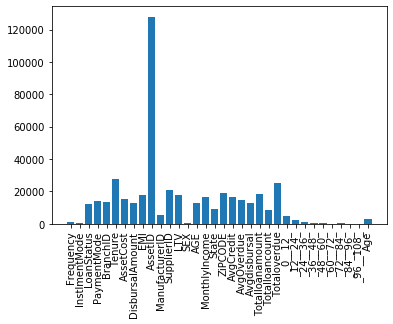

Fold 1
 rows of train = 83247 rows of holdout = 42886
Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.24785	valid_0's macroF1: 0.261417
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 1.24785	valid_0's macroF1: 0.261417
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 1.2478466610674168), ('macroF1', 0.2614171065627494)])})
####################################################################################################
Fold 2
 rows of train = 83247 rows of holdout = 42886
Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 1.25049	valid_0's macroF1: 0.256601
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 1.25049	valid_0's macroF1: 0.256601
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 1.2504949771192062), ('macroF1', 0.25660097083881606)])})
########

In [54]:
from sklearn.metrics import roc_auc_score,accuracy_score ,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,StratifiedKFold
from lightgbm import LGBMClassifier
test_size=0.34
target=train_df12['Top-up Month']
def evaluate_macroF1_lgb(truth, predictions):  
    # this follows the discussion in https://github.com/Microsoft/LightGBM/issues/1483
    pred_labels = predictions.reshape(len(np.unique(truth)),-1).argmax(axis=0)
    f1 = f1_score(truth, pred_labels, average='macro')
    return ('macroF1', f1, True) 



probs_lgb = np.zeros(shape=(len(test_df123),))
scores = []

f1_score1 = []

seeds = [1]

for seed in range(len(seeds)):
    
    print(' ')
    
    print('#'*100)
    
    print('Seed',seeds[seed])

    X_train_cv,y_train_cv = train_df123.copy(), target.copy()

    sssf = StratifiedShuffleSplit(n_splits=5, test_size = test_size ,random_state=seed)
    
    for i, (idxT, idxV) in enumerate(sssf.split(X_train_cv, y_train_cv)):

        print('Fold',i)

        print(' rows of train =',len(idxT),'rows of holdout =',len(idxV))
        clf = LGBMClassifier(subsample = 0.4,
                                 reg_lambda = 0,
                                 reg_alpha = 2,
                                 random_state = 55,
                                 num_leaves = 24,
                                 n_estimators = 100,
                                 max_depth = 10,
                                 learning_rate = 0.3,
                                 importance_type = 'gain',
                                 colsample_bytree = 0.6,
                                 boosting_type = 'gbdt',
                                 objective='multiclass',
                                 class_weight='balanced')
        h = clf.fit(X_train_cv.iloc[idxT], y_train_cv.iloc[idxT],eval_set=[(X_train_cv.iloc[idxV],y_train_cv.iloc[idxV])],
                    verbose=100,eval_metric=evaluate_macroF1_lgb,early_stopping_rounds=100)
        probs_oof = clf.predict_proba(X_train_cv.iloc[idxV])[:,1]
        
        probs_lgb +=clf.predict_proba(test_df123)[:,1]
        
        print(clf.best_score_)

        print('#'*100)

        if i==0:
            feature_importance(clf,X_train_cv)

#print("f1_score_stats {0:.8f},{1:.8f}".format(np.array(f1_score1).mean(), np.array(f1_score1).std()))

#print('%.8f (%.8f)' % (np.array(scores).mean(), np.array(scores).std()))

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [245]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45,shuffle=True,stratify=y)

In [246]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((102924, 34), (25731, 34), (102924,), (25731,))

In [247]:
x_test.info(max_cols=20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25731 entries, 60873 to 76913
Columns: 34 entries, Frequency to Age
dtypes: float64(3), int32(17), int64(14)
memory usage: 5.2 MB


In [248]:
from sklearn.metrics import f1_score
def evaluate_macroF1_lgb(truth, predictions):  
    # this follows the discussion in https://github.com/Microsoft/LightGBM/issues/1483
    pred_labels = predictions.reshape(len(np.unique(truth)),-1).argmax(axis=0)
    f1 = f1_score(truth, pred_labels, average='macro')
    return ('macroF1', f1, True) 

import lightgbm as lgb
fit_params={"early_stopping_rounds":300, 
            "eval_metric" : evaluate_macroF1_lgb, 
            "eval_set" : [(x_test,y_test)],
            'eval_names': ['valid'],
            'verbose': False,
            'categorical_feature': 'auto'}

def learning_rate_power_0997(current_iter):
    base_learning_rate = 0.1
    min_learning_rate = 0.02
    lr = base_learning_rate  * np.power(.995, current_iter)
    return max(lr, min_learning_rate)

fit_params['callbacks'] = [lgb.reset_parameter(learning_rate=learning_rate_power_0997)]

In [249]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(12, 50), 
             'min_child_samples': sp_randint(40, 100), 
             #'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.75, scale=0.25), 
             'colsample_bytree': sp_uniform(loc=0.8, scale=0.15),
             'reg_alpha': [0, 1e-3, 1e-1, 1, 10],
             'reg_lambda': [0, 1e-3, 1e-1, 1, 10],
             'n_estimators': sp_randint(100,2000),
             'learning_rate':[1e-3, 1e-1, 0.05,0.2,0.1,0.3]
            }
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
clf = lgb.LGBMClassifier(max_depth=-1, learning_rate=0.2, objective='multiclass',
                         random_state=45, silent=True, metric='None', 
                         n_jobs=4, n_estimators=2000, class_weight='balanced')
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='f1_macro',
    cv=5,
    refit=True,
    random_state=45,
    verbose=True)
hyplgm=gs.fit(x_train, y_train, **fit_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 361.0min finished


In [252]:
print("PERFORMANCE IMPROVES FROM TOP TO BOTTOM")
print("Valid+-Std     Train  :   Parameters")
print(gs.best_score_)
opt_parameters = gs.best_params_

PERFORMANCE IMPROVES FROM TOP TO BOTTOM
Valid+-Std     Train  :   Parameters
0.3922425939960589


In [253]:
clf_final = lgb.LGBMClassifier(**clf.get_params())
clf_final.set_params(**opt_parameters)

def learning_rate_power_0997(current_iter):
    base_learning_rate = 0.1
    min_learning_rate = 0.02
    lr = base_learning_rate  * np.power(.997, current_iter)
    return max(lr, min_learning_rate)
F
#Train the final model with learning rate decay
fit_params['verbose'] = 200
finalmod = clf_final.fit(x_train, y_train, **fit_params)

Training until validation scores don't improve for 300 rounds
[200]	valid's macroF1: 0.329156
[400]	valid's macroF1: 0.340643
[600]	valid's macroF1: 0.345878
[800]	valid's macroF1: 0.351977
[1000]	valid's macroF1: 0.358749
[1200]	valid's macroF1: 0.367492
[1400]	valid's macroF1: 0.373834
[1600]	valid's macroF1: 0.380412
[1800]	valid's macroF1: 0.381909
Did not meet early stopping. Best iteration is:
[1896]	valid's macroF1: 0.384037


In [55]:
#test_df123=test_df12.drop(['ID','DisbursalDate','MaturityDAte'],axis=1)
predict=le.inverse_transform(h.predict(test_df123))

In [56]:
test_df12['Top-up Month']=predict

In [57]:
df_out=test_df12[['ID','Top-up Month']]
df_out.to_csv('prediction5.csv',index=False)